[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


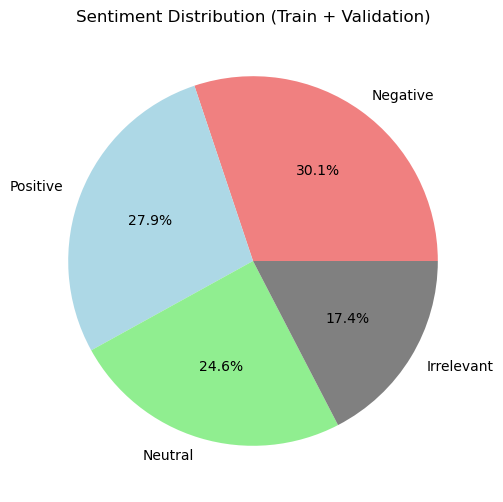

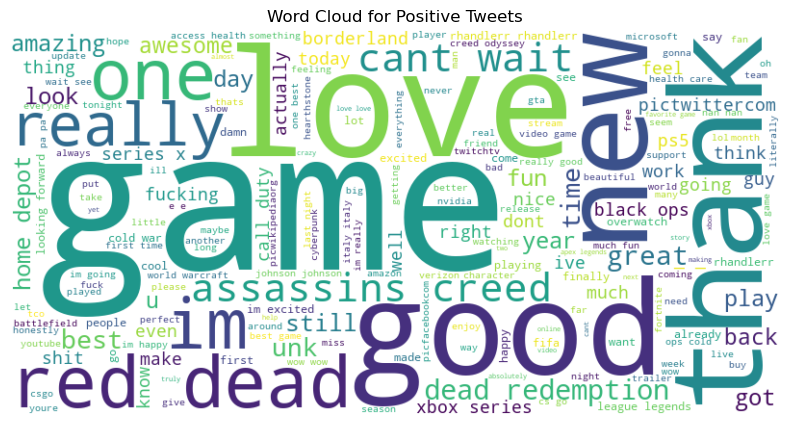

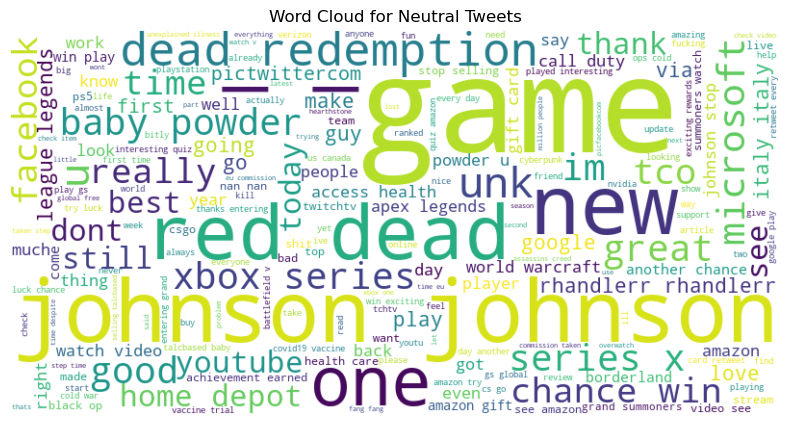

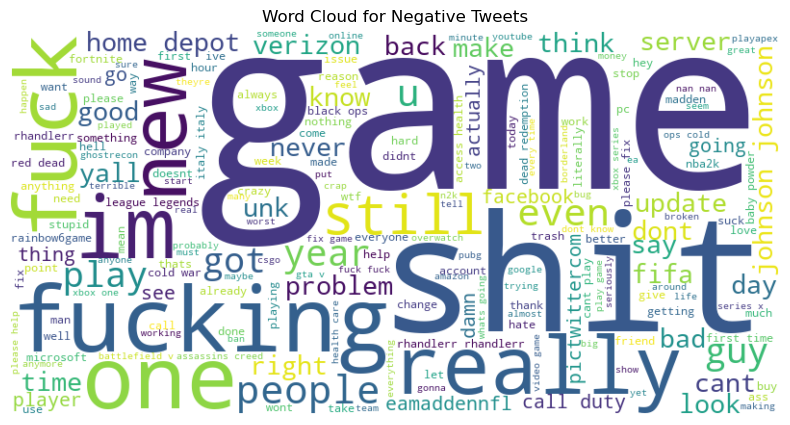

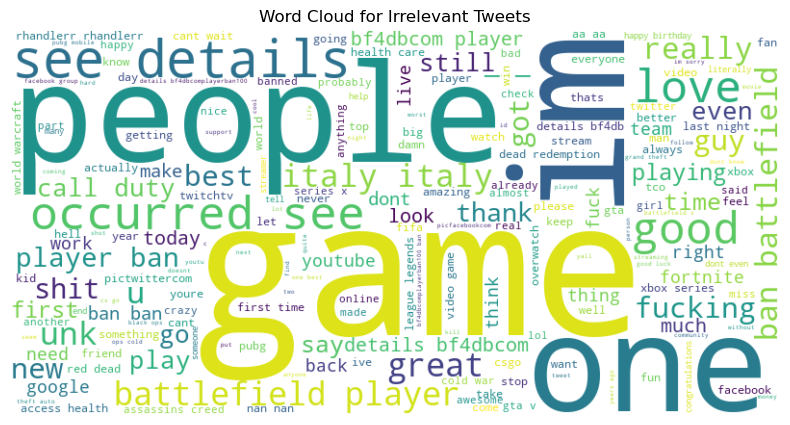

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

%matplotlib inline

# Load datasets
train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

# Assign columns (update if your files have different columns)
train_df.columns = ['id', 'entity', 'sentiment', 'text']
val_df.columns = ['id', 'entity', 'sentiment', 'text']

# Combine train and validation
df = pd.concat([train_df, val_df], ignore_index=True)

# Clean text function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].astype(str).apply(clean_text)

# Map sentiment if numeric; else capitalize
if pd.api.types.is_numeric_dtype(df['sentiment']):
    label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    df['sentiment'] = df['sentiment'].map(label_map)
else:
    df['sentiment'] = df['sentiment'].str.capitalize()

# Display sentiment distribution pie chart
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightblue', 'lightgreen', 'grey']
)
plt.title('Sentiment Distribution (Train + Validation)')
plt.ylabel('')
plt.show()

# Generate word cloud per sentiment
for sentiment in df['sentiment'].dropna().unique():
    text_data = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text_data)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()
